In [1]:
from qiskit import *
from qiskit.visualization import visualize_transition


<h1> Single Qubit Gates </h1> 

c:\Users\jugal\.conda\envs\QCQML\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


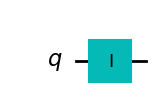

In [2]:
S_sim = Aer.backends("statevector_simulator")[0]
M_sim = Aer.backends("qasm_simulator")[0]

qr = QuantumRegister(1,'q')
cr = ClassicalRegister(1)

quantumCircuit = QuantumCircuit(qr,name='qc')

quantumCircuit.id(qr[0])

quantumCircuit.draw("mpl")

<h2> Hadamard Gates </h2>

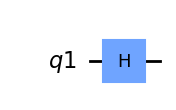

In [3]:
qr = QuantumRegister(1,"q1")

qc = QuantumCircuit(qr,name="qc")

qc.h(qr[0])

qc.draw("mpl")

In [ ]:
visualize_transition(qc)

<h2> Pauli Operators </h2>

<h3> X operator </h3>

In [4]:
qr = QuantumRegister(1)

qc = QuantumCircuit(qr)

qc.x(0)

qc.draw("mpl")

job = execute(qc,S_sim)

results = job.result()

print(results.get_statevector())

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [ ]:
visualize_transition(qc)

<h3> Y operator </h3>

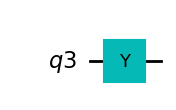

In [5]:
qr = QuantumRegister(1)

qc = QuantumCircuit(qr)

qc.y(0)

qc.draw("mpl")


In [6]:

job = execute(qc,S_sim)

results = job.result()

print(results.get_statevector())

Statevector([0.-0.j, 0.+1.j],
            dims=(2,))


In [ ]:
visualize_transition(qc)

<h3> Z operator </h3>

c:\Users\jugal\.conda\envs\QCQML\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


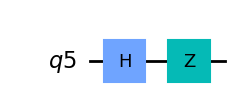

In [7]:
qr = QuantumRegister(1)

qc = QuantumCircuit(qr)

qc.h(0) # applying for better visualization

qc.z(0)

qc.draw("mpl")

In [8]:

job = execute(qc,S_sim)

results = job.result()

print(results.get_statevector())

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


In [ ]:
visualize_transition(qc,fpg=30)

<h1> Two Qubit Gates </h1>

<h2> Controlled Not Gates </h2>

C:\Users\jugal\AppData\Local\Temp\ipykernel_23512\474621819.py:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(0,1)


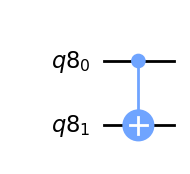

In [9]:
qr = QuantumRegister(2)

qc = QuantumCircuit(qr)

qc.cnot(0,1)

qc.draw("mpl")



In [10]:
job = execute(qc,S_sim)

results = job.result()

print(results.get_statevector())

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


C:\Users\jugal\AppData\Local\Temp\ipykernel_23512\1302105731.py:6: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(0,1)


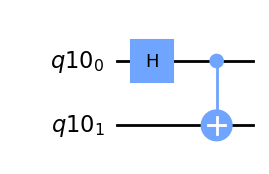

In [11]:
qr = QuantumRegister(2)

qc = QuantumCircuit(qr)

qc.h(0)
qc.cnot(0,1)

qc.draw("mpl")

In [12]:
job = execute(qc,S_sim)

results = job.result()

print(results.get_statevector())

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


<h2> Swap Gates </h2>

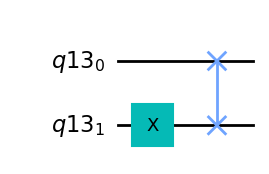

In [13]:
qr = QuantumRegister(2)

qc = QuantumCircuit(qr)

qc.x(1)
qc.swap(0,1)

qc.draw("mpl")



In [14]:
job = execute(qc,S_sim)

results = job.result()

print(results.get_statevector())

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


<h1> Measurements of Qubit circuits </h1>

<h2> Single Qubit Measurement </h2>

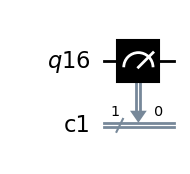

In [15]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

M_sim = Aer.backends("qasm_simulator")[0]
qc = QuantumCircuit(qr,cr)


qc.measure(qr,cr)
qc.draw("mpl")


In [16]:
job = execute(qc,M_sim)

results = job.result()

results.get_counts(qc)

{'0': 1024}

<h2> Measuring superposition state by applying hadamard gate to single qubit before measuring </h2>

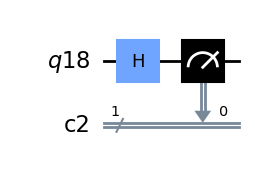

In [17]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

qc = QuantumCircuit(qr,cr)
qc.h(0)
qc.measure(qr,cr)
qc.draw("mpl")

In [18]:
job = execute(qc,M_sim)

results = job.result()

results.get_counts(qc)

{'0': 521, '1': 503}

<h2> Measuring after applying Pauli X operator on single Qubit </h2>

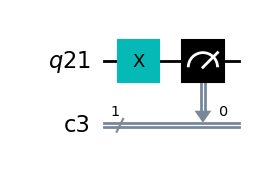

In [19]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

qc = QuantumCircuit(qr,cr)

qc.x(0)
qc.measure(0,0)
qc.draw("mpl")


In [20]:
job = execute(qc,M_sim)

results = job.result()

results.get_counts(qc)

{'1': 1024}

<h2> Two Qubit Measurements </h2>

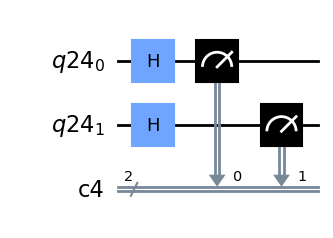

In [21]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr,cr)

qc.h(0)
qc.h(1)
qc.measure(qr,cr)

qc.draw("mpl")

In [ ]:
job =  execute(qc,M_sim)

results = job.result()

results.get_counts(qc)